<a href="https://colab.research.google.com/github/TrongAnh2210/AI_Homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [21]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [22]:
folder = '/content/gdrive/MyDrive/data_food'
photos, labels = list(), list()
# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if  file.startswith('banhbeo'):
        output = 1.0
  elif file.startswith('banhgio'):
        output = 2.0
  elif file.startswith('banhmi'):
        output = 3.0
  elif file.startswith('banhtet'):
        output = 4.0
  elif file.startswith('banhxeo'):
        output = 5.0
  elif file.startswith('bundaumamtom'):
        output = 6.0
  elif file.startswith('cakho'):
        output = 7.0
  elif file.startswith('chaolong'):
        output = 8.0
  elif file.startswith('nemchua'):
        output = 9.0
  elif file.startswith('pho'):
        output = 10.0
  photo = load_img(folder + '/' + file, target_size= (30,40,3))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/result_food/food_photos.npy', photos)
save('/content/gdrive/MyDrive/result_food/food_labels.npy', labels)

(1126, 30, 40, 3) (1126,)


In [23]:

# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/result_food/food_photos.npy')
labels = np.load('/content/gdrive/MyDrive/result_food/food_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)
print(photos.shape, labels.shape)
# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:7], labels[:7]
train_x, train_y = photos[7:], labels[7:]

(1126, 30, 40, 3) (1126, 11)


In [24]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [25]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 40, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 8, 64)          36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 6, 8, 64)         

In [41]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,fill_mode='nearest')

datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=20), epochs=30, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/30
56/56 [==============================] - 4s 20ms/step - loss: 0.1641 - accuracy: 0.9383 - val_loss: 0.9225 - val_accuracy: 0.5714
Epoch 2/30
56/56 [==============================] - 1s 17ms/step - loss: 0.1585 - accuracy: 0.9544 - val_loss: 0.1173 - val_accuracy: 1.0000
Epoch 3/30
56/56 [==============================] - 1s 18ms/step - loss: 0.1299 - accuracy: 0.9651 - val_loss: 2.5707 - val_accuracy: 0.4286
Epoch 4/30
56/56 [==============================] - 1s 17ms/step - loss: 0.1586 - accuracy: 0.9571 - val_loss: 1.3237 - val_accuracy: 0.7143
Epoch 5/30
56/56 [==============================] - 1s 16ms/step - loss: 0.1295 - accuracy: 0.9580 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 6/30
56/56 [==============================] - 1s 17ms/step - loss: 0.0854 - accuracy: 0.9687 - val_loss: 0.9894 - val_accuracy: 0.7143
Epoch 7/30
56/56 [==============================] - 1s 17ms/step - loss: 0.1968 - accuracy: 0.9473 - val_loss: 0.8707 - val_accuracy: 0.7143
Epoch 8/30
56

Test loss: 0.1359904706478119
Test accunacy 0.8571428656578064


Text(0.5, 1.0, 'Training & Testing Accuracy')

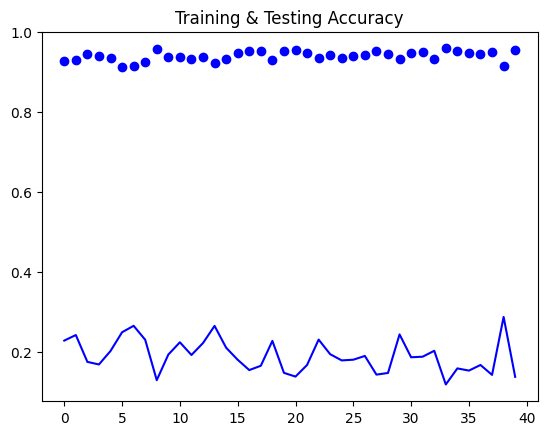

In [31]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

1/1 [==============================] - 0s 96ms/step
pho


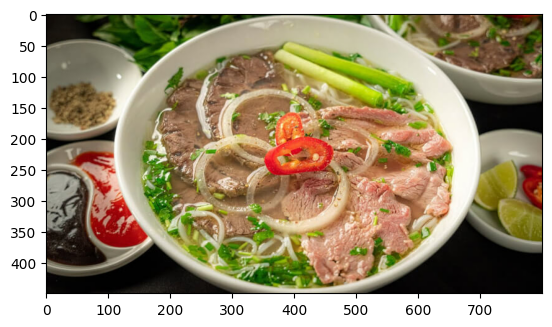

1/1 [==============================] - 0s 20ms/step
banhbeo


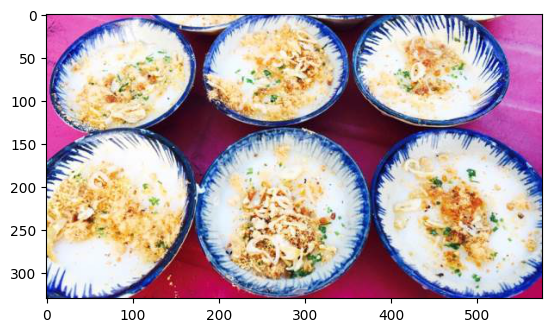

1/1 [==============================] - 0s 19ms/step
chaolong


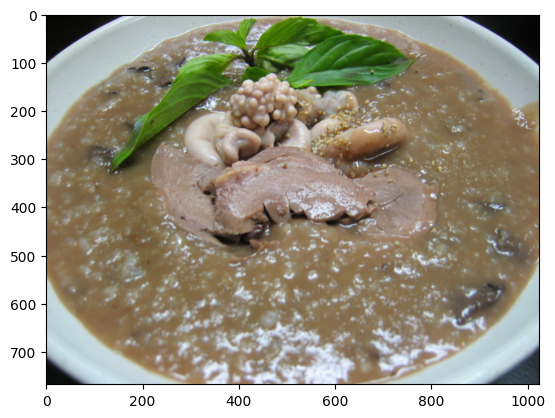

1/1 [==============================] - 0s 19ms/step
nemchua


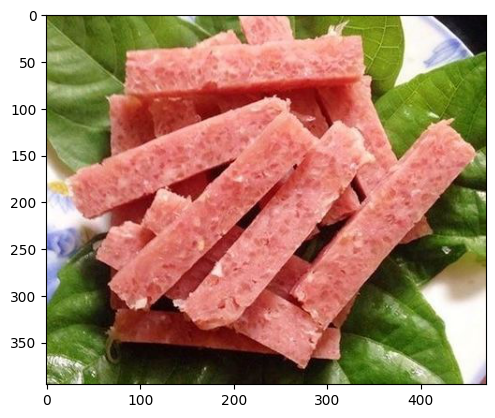

1/1 [==============================] - 0s 21ms/step
bundaumamtom


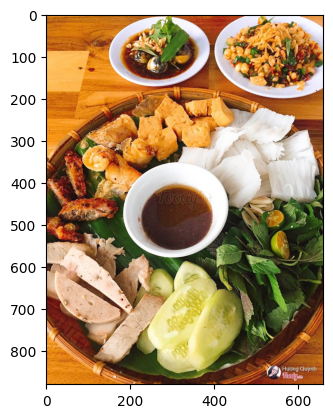

1/1 [==============================] - 0s 19ms/step
banhxeo


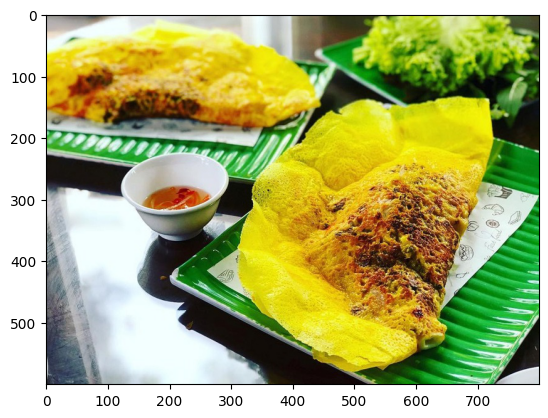

1/1 [==============================] - 0s 25ms/step
banhgio


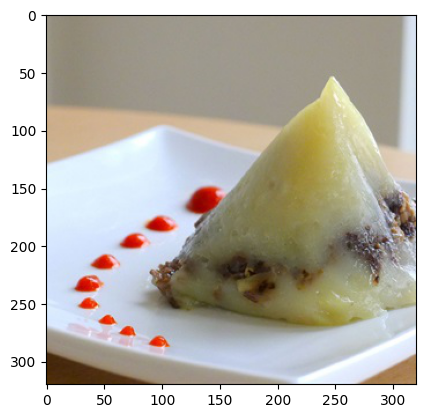

1/1 [==============================] - 0s 23ms/step
banhmi


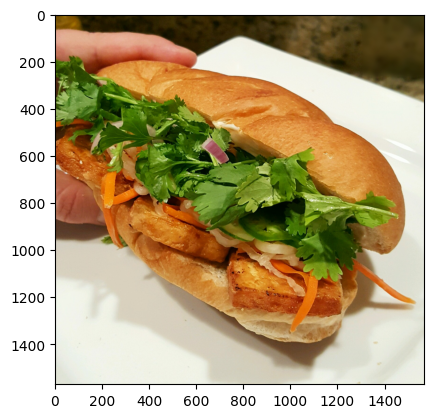

1/1 [==============================] - 0s 29ms/step
cakho


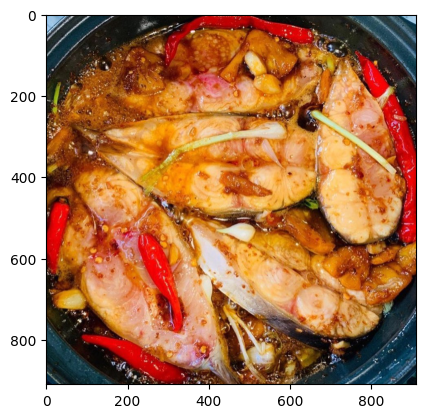

1/1 [==============================] - 0s 41ms/step
banhtet


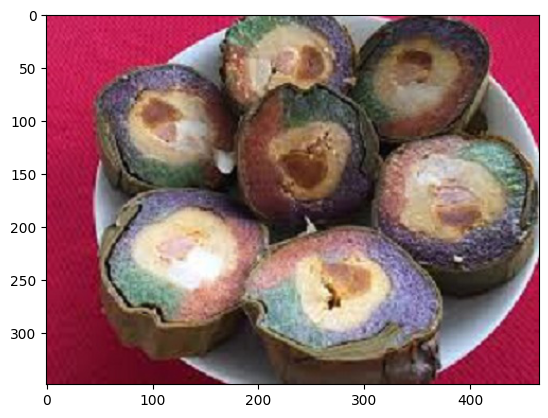

In [42]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/food_test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','banhbeo', 'banhgio', 'banhmi', 'banhtet', 'banhxeo','bundaumamtom','cakho','chaolong','nemchua','pho']
  print(class_name[result])
  plt.show()